# Introduction to AI
## Ghazal Kalhor

<div style="text-align: justify; font-weight: bold;">
<i>Abstract</i> — In this computer assignment, we want to learn how to
work with some of the most important libraries in Python such as
NumPy, Pandas, and matplotlib that will help us in learning
Artificial Intelligence; this is done by working with data frames
and using them to predict a simple statistical model.  
    
<i>Keywords</i> — Python, NumPy, Pandas, Matplotlib, Artificial
Intelligence
 </div>

### Introduction
<br/>
<div style="text-align: justify;"> 
The goal of this computer assignment is to design a simple statistical
model in order to predict missing values of the target column; this is done by using samples that have a pre-determined target value.
Some characteristics of users such as Age, Area Income, and Gender are given in this computer assignment, The input of our model will be one of these characteristics and the output is the target column which determines whether the user has clicked on the Ad or not.
</div>

### Importing Libraries
<br/>
<div style="text-align: justify;">
In this part, some of the necessary libraries were imported in order to use their helpful functions. These libraries are mostly used in data science applications.
</div>

In [1]:
import numpy as np
import pandas as pd
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

### Defining Constants
<br/>
<div style="text-align: justify;">
In this part constant values are defined in order to make the code more readable and more flexible to change.
</div>

In [2]:
TRUE = 1
FALSE = 0
MALE = 1
FEMALE = 0
MY_AGE = 21
CLICKED = 1
NOT_CLICKED = 0
TARGET = 'Clicked on Ad'

### Importing Data

Contents of file *advertising_dataset.csv* was read using *pd.read_csv* and then stored in the *advertising* dataframe.


In [3]:
advertising = pd.read_csv('advertising_dataset.csv', index_col = 'Unnamed: 0')

Pandas *tail* method is used in order to return the last _n_ rows of the dataframe. *n* is 5 by default.

In [4]:
advertising.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


Pandas *head* method is used in order to return the first _n_ rows of the dataframe. *n* is 5 by default.

In [5]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


### Basic Statistical Details of  Data
Pandas *describe* method is used in order to view some basic statistical details like max, min, percentile, mean, std etc. of the dataframe.

In [6]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


### Concise Summary of  Data 
This method prints information about the dataframe such as the index dtype and column dtypes, non-null values and memory usage.

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  907 non-null    float64
 1   Age                       979 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      913 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


### Label Encoding

In this part _replace_ method is used in oreder to convert categorical data to numerical data.

In [8]:
advertising = advertising.replace({'Gender': {'Male': MALE, 'Female': FEMALE}})

In [9]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


### Counting Missing Values
In this part the combination of two Pandas methods (_isna_ and _sum_) is used in oreder to count number of missing values at each column.

In [10]:
advertising.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

### Filling Missing Values
Pandas *fillna* method is used to fill out the missing values in the given column.

In [11]:
for column in advertising:
    if advertising[column].isnull().values.any() == False or column == TARGET:
        continue 
    advertising[column] = advertising[column].fillna(advertising[column].mean())

In [12]:
advertising.isna().sum()

Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

### Another Approach for Handling Missing Values
Another way to handle missing values in datasets is to drop the rows having null values.   
**Pros:**
<ul>
    <li>
Complete removal of data with missing values results in robust and highly accurate model.
    </li>
    <li>
Deleting a particular row or a column with no specific information is better, since it does not have a high weightage.
    </li>
</ul>
<b>Cons:</b>
<ul>
    <li>
It can cause loss of information and data.
    </li>
    <li>
It works poorly if the percentage of missing values is high (about 30%), compared to the whole dataset.
    </li>
</ul>

### Counting Female & Male Users
Pandas *groupby* method is used to split the data into groups based on some criteria.

In [13]:
advertising.groupby(['Gender'])['Gender'].agg(['count'])

,count
Gender,
0,519
1,481


### Counting Users has Clicked on Ad or not

In [14]:
advertising.groupby([TARGET])[TARGET].agg(['count'])

,count
Clicked on Ad,
0.0,419
1.0,413


### Counting Female Users Older than Me
Pandas *loc* attribute access a group of rows and columns by label(s) or a boolean array in the given dataframe.

In [15]:
specific_users = len(advertising.loc[(advertising['Age'] > MY_AGE) & (advertising['Gender'] == FEMALE)].index)
print('Number of Users that are Female and Older than me:', specific_users)

Number of Users that are Female and Older than me: 514


### Using Vectorization
In this part Pandas *groupby* buit-in method is used in order make computation vectorized.

In [16]:
tic = time()

avg_age = advertising.groupby([TARGET])['Age'].mean()

toc = time()

print(avg_age)
print('vectorization: %f ms' % ((toc - tic)  * 1000))

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64
vectorization: 2.371550 ms


### Using For Loop

In [17]:
clicked_avg_age = 0
didnt_click_avg_age = 0

clicked_count = 0
didnt_click_count = 0

tic = time()

for index, row in advertising.iterrows():
    if row[TARGET] == TRUE:
        clicked_avg_age += row['Age']
        clicked_count += 1
    elif row[TARGET] == FALSE:
        didnt_click_avg_age += row['Age']
        didnt_click_count += 1
        
if clicked_count > 0:
    clicked_avg_age /= clicked_count
    
if didnt_click_count > 0:
    didnt_click_avg_age /= didnt_click_count
    
toc = time()

print('Average Age of Users who did not click on Ad:', didnt_click_avg_age)
print('Average Age of Users who clicked on Ad:', clicked_avg_age)
print('for loop: %f ms' % ((toc - tic)  * 1000))

Average Age of Users who did not click on Ad: 31.723325881701896
Average Age of Users who clicked on Ad: 40.295599848637366
for loop: 244.388580 ms


<div style="text-align: justify;"> 
    What is happening in vectorization is that NumPy calls high quality numerical libraries (BLAS for instance) which are very good at vector arithmetic. Therefore, the result of our computation will ready much faster than using for loop. In this examole our computation was about 100 times faster by using vectorization.
</div>

### Dropping Non-Numeric Columns
In this part non-numeric columns are dropped from our dataframe; this is done by using *is_numeric_dtype* method to check for numeric columns and *drop* method to drop the *given* column.

In [18]:
for column in advertising:
    if is_numeric_dtype(advertising[column]) == False:
        advertising.drop(column, axis=1, inplace=True)

### Plotting Histogram of Characteristics
In this part histogram of each column is drawn using Pandas *hist* method. We formatted these histograms using useful methods such as *suptitle*, *xlabel*, and *ylabel* from matplotlib library.

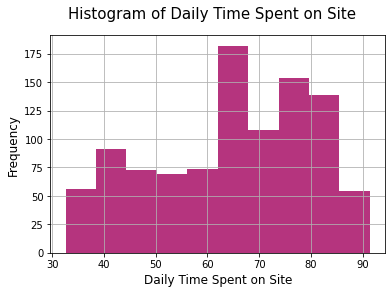

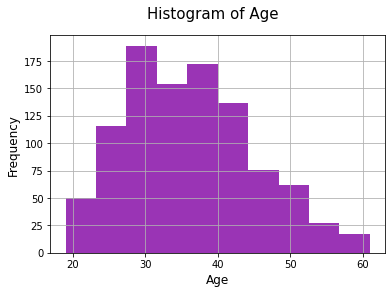

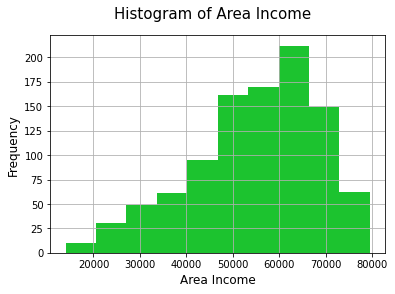

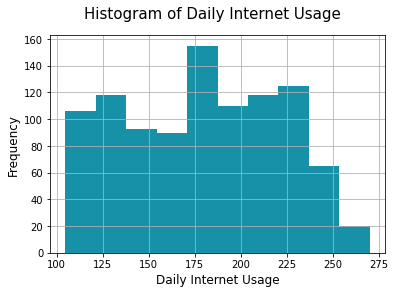

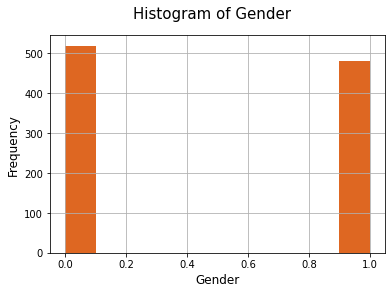

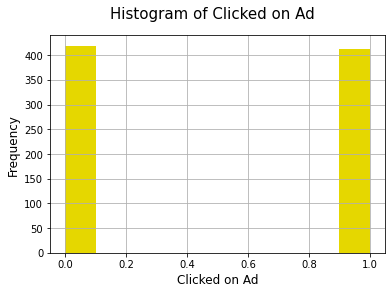

In [19]:
colors = ['#b5347e', '#9a34b5', '#1cc32f', '#1691a7', '#de6722', '#e5d700']
cursor = 0

for column in advertising:
    plt.figure() 
    plt.suptitle('Histogram of ' + column, fontsize = 15)
    plt.xlabel(column, fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    advertising[column].hist(color = colors[cursor])
    cursor += 1

### Dropping *Gender* Column

In [20]:
advertising.drop('Gender', axis=1, inplace=True)

In [21]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35.0,61833.90,256.090000,0.0
1,80.23,31.0,68441.85,179.751271,0.0
2,69.47,26.0,59785.94,236.500000,0.0
3,74.15,29.0,54806.18,245.890000,0.0
4,68.37,35.0,73889.99,225.580000,0.0


### Normalizing Data
In this part values of each column is normalized; this is done by subtracting each column value by the mean and then dividing the result by the standard deviation of that column.

In [22]:
for column in advertising:
    if column != TARGET:
        advertising[column] -= advertising[column].mean()
        advertising[column] /= advertising[column].std()

In [23]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0


In [24]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,832.000000
mean,1.101341e-16,2.184919e-16,-3.854694e-16,-1.740830e-16,0.496394
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500288
min,-2.118908e+00,-1.957144e+00,-3.056625e+00,-1.785019e+00,0.000000
25%,-7.891122e-01,-8.065049e-01,-5.939929e-01,-9.032985e-01,0.000000
50%,5.430951e-02,-1.161217e-01,1.500078e-01,0.000000e+00,0.000000
75%,8.432692e-01,6.893254e-01,7.805382e-01,8.247266e-01,1.000000
max,1.753000e+00,2.875539e+00,1.825231e+00,2.147814e+00,1.000000


### Plotting PMF of Characteristics 
In this part the probability density function is drawn for each characteristic. In each plot, We drew two curves in each figure. These curves indicate whether the user has clicked on ad or not.

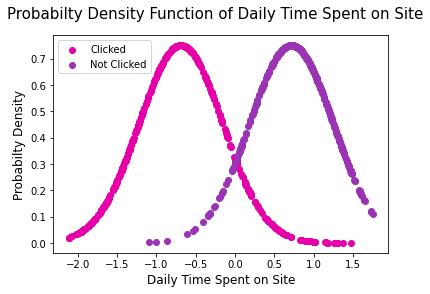

Clicked std 0.8361610114854059
not clicked std 0.5313689387678912


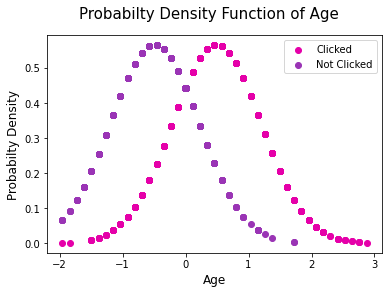

Clicked std 1.019267520705244
not clicked std 0.7063146454191541


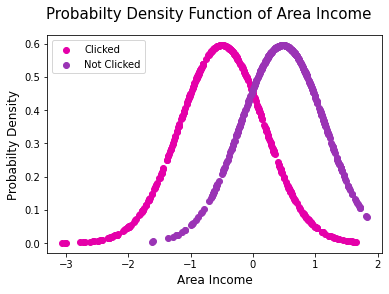

Clicked std 1.0461990555400822
not clicked std 0.6704761762169467


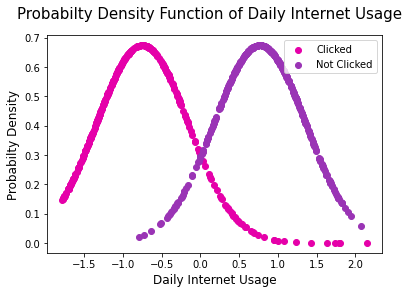

Clicked std 0.7239588576012945
not clicked std 0.592057888773502


In [25]:
for column in advertising:
    if column == TARGET:
        continue 
        
    clicked_characteristic = advertising.loc[(advertising[TARGET] == TRUE), column]
    clicked_mean = clicked_characteristic.mean()
    clicked_std = clicked_characteristic.std()

    not_clicked_characteristic = advertising.loc[(advertising[TARGET] == FALSE), column]
    not_clicked_mean = not_clicked_characteristic.mean()
    not_clicked_std = not_clicked_characteristic.std()

    clicked_pdf = norm.pdf(clicked_characteristic, clicked_mean, not_clicked_std)
    not_clicked_pdf = norm.pdf(not_clicked_characteristic, not_clicked_mean, not_clicked_std)
    
    fig = plt.figure()
    plt.scatter(clicked_characteristic, clicked_pdf, c = '#e500a9')
    plt.scatter(not_clicked_characteristic, not_clicked_pdf, c = '#9a34b5')
    fig.suptitle('Probabilty Density Function of ' + column , fontsize = 15)
    plt.xlabel(column, fontsize = 12)
    plt.ylabel('Probabilty Density', fontsize = 12)
    plt.legend(['Clicked', 'Not Clicked'])
    plt.show()
    print('Clicked std', clicked_std)
    print('not clicked std', not_clicked_std)

### Selecting the Best Characterstic 
<ul>
    <li>
The area between each two curves indicates records for which the target value will be predicted incorrectly (false negative or false positive). The selected characteristic should minimizes this area. 
    </li>
    <li>
The smaller the standard deviation is, the more accurate our classification is. 
    </li>
    <li>
The further the two curves are, the better our classification is.
    </li>
</ul>
<i>Daily Internet Usage</i> is the best characteristic that satifies the criterias that are mentioned above.

In [26]:
selected = 'Daily Internet Usage'

### Storing Mean & Std of Selected Characterstic 

In [27]:
clicked_selected = advertising.loc[(advertising[TARGET] == TRUE), selected]
clicked_mean = clicked_selected.mean()
clicked_std = clicked_selected.std()

not_clicked_selected = advertising.loc[(advertising[TARGET] == FALSE), selected]
not_clicked_mean = not_clicked_selected.mean()
not_clicked_std = not_clicked_selected.std()

### Filling Missing Values in Target Column
In this part missing values of target column are fill out based on the model that we designed in last parts.

In [28]:
condition = (advertising[selected] < clicked_mean + clicked_std) & \
    (advertising[selected] > clicked_mean - clicked_std)

advertising = advertising[pd.isnull(advertising[TARGET])]

advertising[TARGET] = advertising[TARGET].fillna(condition.map({True: CLICKED, False: NOT_CLICKED}))

### Storing Prediction Result in a File
In this part the prediction result was written in the *prediction_result.csv* file using Pandas *to_csv* method.

In [29]:
advertising[TARGET].to_csv('prediction_result.csv')

In [30]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
10,-1.129048,1.494773,-0.698304,-1.374546,1.0
14,-1.437721,-0.346249,-1.790880,-0.861692,1.0
15,-0.088509,-1.496888,-0.210052,-0.931215,1.0
20,0.817766,-0.691441,0.730719,1.064011,0.0
24,-1.540393,0.574262,1.040827,-0.298362,1.0


### Conclusion
In this computer assignment we learned that Python
libraries are very powerful tools in Artificial Intelligence. Also
we were introduced one of the applications of Artificial
Intelligence in real life.